In [60]:
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
# Lendo base de dados
df = pd.read_excel('dados.xlsx', sheet_name='base')
df.head()

,Datetime,velocidade_download,velocidade_upload
0,2022-10-11 21:15:00,508,431
1,2022-10-11 21:18:00,582,395
2,2022-10-11 21:23:00,542,360
3,2022-10-11 22:03:00,400,395
4,2022-10-11 22:58:00,523,336


In [62]:
# Renomeando colunas
df.rename(columns={'velocidade_download': 'Download', 'velocidade_upload': 'Upload'}, inplace=True)
df.head()

,Datetime,Download,Upload
0,2022-10-11 21:15:00,508,431
1,2022-10-11 21:18:00,582,395
2,2022-10-11 21:23:00,542,360
3,2022-10-11 22:03:00,400,395
4,2022-10-11 22:58:00,523,336


In [63]:
# Criando coluna com data
df['Data'] = df['Datetime'].dt.date
df.head()

,Datetime,Download,Upload,Data
0,2022-10-11 21:15:00,508,431,2022-10-11
1,2022-10-11 21:18:00,582,395,2022-10-11
2,2022-10-11 21:23:00,542,360,2022-10-11
3,2022-10-11 22:03:00,400,395,2022-10-11
4,2022-10-11 22:58:00,523,336,2022-10-11


In [64]:
# Criando coluna com data
df['Time'] = df['Datetime'].dt.time
df.head()

,Datetime,Download,Upload,Data,Time
0,2022-10-11 21:15:00,508,431,2022-10-11,21:15:00
1,2022-10-11 21:18:00,582,395,2022-10-11,21:18:00
2,2022-10-11 21:23:00,542,360,2022-10-11,21:23:00
3,2022-10-11 22:03:00,400,395,2022-10-11,22:03:00
4,2022-10-11 22:58:00,523,336,2022-10-11,22:58:00


In [65]:
# removendo coluna datetime
df = df.drop(columns=['Datetime'])
df.head()

,Download,Upload,Data,Time
0,508,431,2022-10-11,21:15:00
1,582,395,2022-10-11,21:18:00
2,542,360,2022-10-11,21:23:00
3,400,395,2022-10-11,22:03:00
4,523,336,2022-10-11,22:58:00


In [66]:
# Mexima de velocidade de download
df["Download"].max()

807

In [67]:
# Media de velocidade de download
df["Download"].mean()

444.45454545454544

In [68]:
# Minima de velocidade de download
df["Download"].min()

145

In [69]:
# Maxima de velocidade de upload
df["Upload"].max()

431

In [70]:
# Media de velocidade de upload
df["Upload"].mean()

232.4935064935065

In [71]:
# minima de velocidade de upload
df["Upload"].min()

114

In [73]:
# Somando velocidade de download
df["Download"].sum()

34223

In [74]:
# Somando velocidade de upload
df["Upload"].sum()

17902

In [80]:
# Somando velocidade de download por dia
df.groupby(df['Data'])['Download'].sum()

Data
2022-10-11     3695
2022-10-12    11895
2022-10-13    18633
Name: Download, dtype: int64

<AxesSubplot: title={'center': 'Somando velocidade de download por dia'}, xlabel='Data'>

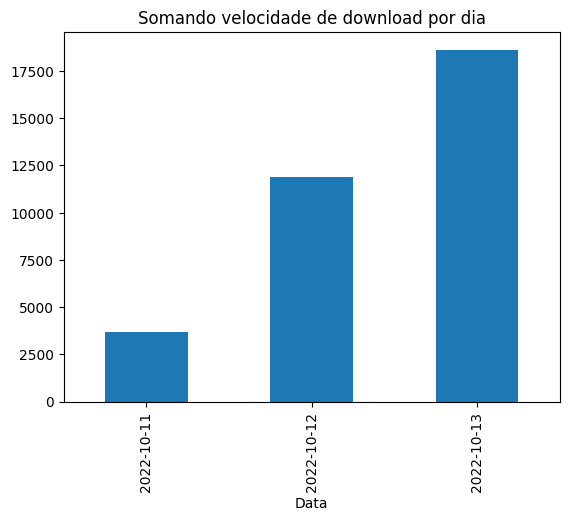

In [102]:
# Somando velocidade de download por dia
df.groupby(df['Data'])['Download'].sum().plot(kind='bar', title='Somando velocidade de download por dia')

In [81]:
# Somando velocidade de upload por dia
df.groupby(df['Data'])['Upload'].sum()

Data
2022-10-11    2993
2022-10-12    6545
2022-10-13    8364
Name: Upload, dtype: int64

<AxesSubplot: title={'center': 'Somando velocidade de upload por dia'}, ylabel='Data'>

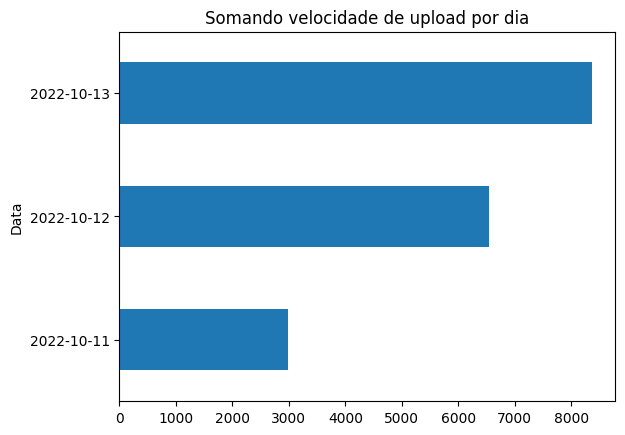

In [103]:
# Somando velocidade de upload por dia
df.groupby(df['Data'])['Upload'].sum().plot(kind='barh', title='Somando velocidade de upload por dia')

In [82]:
# Maiores velocidades de download 
df.nlargest(3, "Download")

,Download,Upload,Data,Time
49,807,177,2022-10-13,02:10:00
70,742,350,2022-10-13,07:05:00
71,738,383,2022-10-13,07:10:00


In [83]:
# Maiores velocidades de upload 
df.nlargest(3, "Upload")

,Download,Upload,Data,Time
0,508,431,2022-10-11,21:15:00
68,731,408,2022-10-13,06:50:00
1,582,395,2022-10-11,21:18:00


<AxesSubplot: title={'center': 'Velocidade de Download acima da média'}>

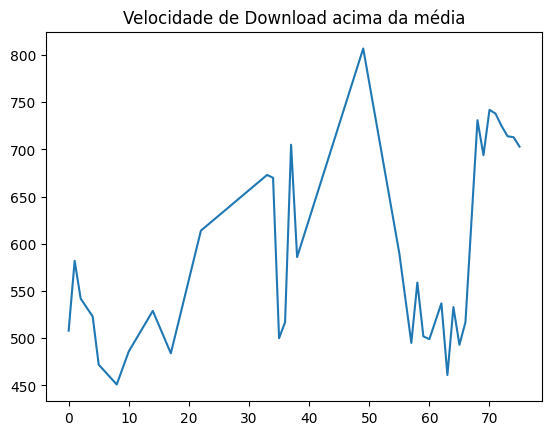

In [110]:
# Velocidade de Download acima da média
data_filtro = df.loc[(df['Download'] > df['Download'].mean())]
data_filtro['Download'].plot(kind='line', title='Velocidade de Download acima da média')